# How to run the PyRICE model

This notebook provides an example of how to run the PyRICE model and shows the main parameters and their domains.

---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
from model.pyrice import PyRICE
from model.enumerations import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

---
## 2. Initialize the model

The most important parameters are listed below.

### Model Parameters

**Bolded** elements are model default values.

| Variable | Values | Description |
| --------------- | --------------- | ---------------------------- |
| `model_specification` | **`ModelSpec.EMA`** <br> `ModelSpec.Validation_1` <br> `ModelSpec.Validation_2` | Stochastic simulation model <br> Replicating RICE2010 <br> Deterministic RICE2010|
| `damage_function` | **`DamageFunction.NORDHAUS`** <br> `DamageFunction.NEWBOLD` <br> `DamageFunction.WEITZMAN` | Nordhaus + SLR <br> Newbold & Daigneault <br> Weitzman |
| `welfare_function` | **`WelfareFunction.UTILITARIAN`** <br> `WelfareFunction.EGALITARIAN` <br> `WelfareFunction.SUFFICIENTARIAN` <br> `WelfareFunction.PRIORITARIAN`| Total aggregated utility <br> Equal distribution of risks & benefits <br> People above some threshold  <br> Wellbeing of worst-off region|


In [2]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(model_specification=model_specification,
               damage_function=damage_function,
               welfare_function=welfare_function)

---
## 3. Run the model
Next, we can run the model with specific lever values. The most important parameters are listed below.

### Levers

| Variable        | Values          | Default       | Description |
| --------------- | --------------- | ----------    | ----------- |
| `sr`            | `[0.1, 0.5]`    | `0.248`       | Savings rate |
| `miu`           | `[2005, 2305]`  | `2135`        | Emission control rate target (year of zero-emission)|
| `irstp_consumption`         | `[0.001, 0.015]`| `0.015`       | Initial rate of social time preference |

### Miscellaneous Parameters

| Variable        | Values          | Default       | Description |
| --------------- | --------------- | ----------    | ----------- |
| `precision`     | `{10, 20, 30}` | `10`           | Precision of timeseries data of final outcomes in years |

Let's take the **original policy by Nordhaus** (which is also the default policy):

In [3]:
results = model()
# for k, v in results.items():
#     print(f'{k}:\t{v}')

---
## 4. View Results
Running the model will return a dictionary containing all outcome variables. This dictionary is handy for conducting further optimization. It is, however, not handy, to inspect the results.

An alternative data structure for this is in form of a `Results` object which is also saved within the model and contains the same information as the dictionary.

First, let's get the results in better formatting.

In [4]:
results_formatted = model.get_better_formatted_results()

## Highly Aggregated variables

In [5]:
print(f'aggregated_utility_gini: \t{results_formatted.aggregated_consumption_gini}')
print(f'aggregated_impact_gini: \t{results_formatted.aggregated_damage_gini}')
print(f'aggregated_utility: \t\t{results_formatted.aggregated_utility}')
print(f'aggregated_disutility: \t\t{results_formatted.aggregated_disutility}')
print(f'aggregated_costs: \t\t{results_formatted.aggregated_costs}')


aggregated_utility_gini: 	0.3690327913633553
aggregated_impact_gini: 	0.491654347271235
aggregated_utility: 		2255.0112446066987
aggregated_disutility: 		6269.685937843502
aggregated_costs: 		1048.3818173963546


## Dataframe on spatially aggregated variables of interest

In [6]:
results_formatted.df_main.head()

,Damages,Utility,Disutility,Lowest income per capita,Highest climate impact per capita,Distance to consumption threshold,Population below consumption threshold,Distance to damage threshold,Population above damage threshold,Intratemporal consumption GINI,Intratemporal damage GINI,Atmospheric temperature,Industrial emission,Total output,Regions below consumption threshold,Regions above damage threshold,Costs
2005,0.087272,-1070.654524,0.000405,0.389919,0.000980,0.391524,1344.275980,0.0,0.0,0.505547,0.585386,0.830000,9.567636,55.291673,"[China, India, Africa, Other non-OECD Asia, In...",[],0.087272
2015,0.245626,667.743977,0.000328,0.691963,0.008097,0.398386,845.308685,0.0,0.0,0.433054,0.568593,0.980000,9.726659,81.009176,"[India, Africa, Other non-OECD Asia, Africa]",[],0.266213
2025,0.487449,1492.441361,5.200168,0.877597,0.011462,0.265622,975.141500,0.0,0.0,0.419838,0.562394,1.196959,10.166511,111.752715,"[India, Africa, Other non-OECD Asia, Africa]",[],0.549978
2035,0.905594,2216.694928,7.768612,1.243212,0.015049,0.103288,1091.706185,0.0,0.0,0.405447,0.558169,1.436645,10.368132,148.171906,"[India, Africa, Other non-OECD Asia, Africa]",[],1.048889
2045,1.554466,2721.480345,11.015197,1.704938,0.019170,0.548407,300.634834,0.0,0.0,0.391946,0.558917,1.681077,10.309960,189.604644,[Africa],[],1.830079


## Dataframe on spatially and temporally disaggregated population

In [7]:
# results_formatted.df_population.head()

## Dataframe on spatially disaggregated CPC

In [8]:
# results_formatted.df_cpc.head()

## Dataframe on CPC pre damage
Cell entries represent quintiles.

In [9]:
results_formatted.df_cpc_pre_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.9224726710998, 17.673359329293834, 26.25265...","[7.992526419783532, 13.638652501271912, 18.391...","[9.899247036554964, 16.45589117764981, 21.3412...","[3.406456492836089, 5.373565171797775, 7.29269...","[1.7697210949898872, 2.705072226116459, 3.5181...","[0.854970913526864, 1.4074136576519145, 2.0124...","[0.638109144538283, 0.92171320877752, 1.197439...","[2.1733546279734735, 3.555323333332738, 4.9085...","[0.39224888751856923, 0.6369693071736533, 0.88...","[1.3478796842514897, 2.711059885609995, 4.1613...","[8.776638808896472, 15.281424899716676, 20.609...","[0.7984760012858524, 1.211401132939834, 1.6400..."
2015,"[10.140987438402323, 20.086955887604603, 29.83...","[9.332956105510688, 15.92599616782146, 21.4754...","[11.077547243334688, 18.41462398892, 23.881465...","[5.152676325822566, 8.128165471720106, 11.0310...","[5.386984868790558, 8.234169323250466, 10.7090...","[2.164092122296639, 3.5624285705498515, 5.0939...","[1.089611814377152, 1.5738837318781085, 2.0447...","[3.004983129878101, 4.91575856991584, 6.786743...","[0.6971481372718336, 1.1320923529054514, 1.573...","[1.8881338374288674, 3.7977009113828166, 5.829...","[10.608775824529852, 18.471446139056344, 24.91...","[1.049674615744739, 1.592504992865954, 2.15601..."
2025,"[12.061819930164738, 23.891681784749384, 35.48...","[11.468764029876265, 19.570593703061622, 26.39...","[13.41857717641339, 22.306206215336545, 28.928...","[5.921848573733898, 9.341507609270376, 12.6777...","[5.340378200289258, 8.162929620637664, 10.6163...","[2.9275112657425018, 4.819133929760733, 6.8909...","[1.5938031778903832, 2.3021601458416647, 2.990...","[3.9168216656775936, 6.407406909691277, 8.8461...","[0.8877721021824835, 1.4416448302316829, 2.003...","[2.5320423508968224, 5.092827294888739, 7.8171...","[12.863075746759288, 22.396515372629793, 30.20...","[1.55943597186949, 2.3658851362190627, 3.20305..."
2035,"[14.177773696362836, 28.082897898564852, 41.71...","[13.89678733651112, 23.71383507692984, 31.9769...","[16.174948021368724, 26.888225282275283, 34.87...","[7.385600669583527, 11.65052499990641, 15.8114...","[5.396432780361215, 8.24861074187679, 10.72780...","[3.8707328562263132, 6.371821778711008, 9.1111...","[2.24092494130315, 3.236891581882328, 4.205192...","[4.971336386594224, 8.132454789297384, 11.2277...","[1.2622068511336477, 2.049685924063652, 2.8483...","[3.301535772938589, 6.640549078303466, 10.1928...","[15.413615314393866, 26.837381597756387, 36.19...","[2.213345262832771, 3.3579581035181962, 4.5461..."
2045,"[16.37410662711248, 32.43332658831895, 48.1776...","[16.489363276887577, 28.13787329423615, 37.942...","[19.10799198881071, 31.763934734646373, 41.193...","[8.969013150303644, 14.148302434281808, 19.201...","[5.5355979244874405, 8.461328874290476, 11.004...","[4.979626079104554, 8.197230622525955, 11.7212...","[3.0493756019187748, 4.404653647216008, 5.7222...","[6.16870947984703, 10.091200243147199, 13.9320...","[1.7382607219113726, 2.82274536131258, 3.92257...","[4.202326051021726, 8.45235499599175, 12.97382...","[18.153476443342022, 31.60788463306799, 42.627...","[3.04293768462177, 4.616567251463918, 6.250142..."


## Dataframe on CPC post damage
Cell entries represent quintiles.

In [10]:
results_formatted.df_cpc_post_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.91190408878549, 17.652425406632798, 26.2215...","[7.981923424116799, 13.620559276955115, 18.366...","[9.88625597833333, 16.434295652294363, 21.3132...","[3.4031215055215807, 5.3683043467382685, 7.285...","[1.7677483786463275, 2.702056869512485, 3.5141...","[0.8529563537731559, 1.4040973823650411, 2.007...","[0.6337878019387009, 0.9154712694670125, 1.189...","[2.1634543035383547, 3.5391277000850874, 4.886...","[0.38991853536284493, 0.6331850700595785, 0.87...","[1.3453601935781796, 2.7059923041512146, 4.153...","[8.765022298834033, 15.261198839378403, 20.581...","[0.7956960939410769, 1.2071836199507076, 1.634..."
2015,"[10.123582167095572, 20.052480061746998, 29.78...","[9.302321606323403, 15.873720671060926, 21.404...","[11.054775271410342, 18.376769282344462, 23.83...","[5.146280186838308, 8.118075787688602, 11.0173...","[5.383221015085465, 8.228416159009143, 10.7015...","[2.150583407359486, 3.5401911474994607, 5.0621...","[1.0807892195427515, 1.5611399837839743, 2.028...","[2.9866374066661723, 4.8857473711161985, 6.745...","[0.691962790064806, 1.12367191597621, 1.561490...","[1.8834540603883179, 3.7882882346012994, 5.814...","[10.568834770317002, 18.401902862449074, 24.81...","[1.0446978845004489, 1.5849545870203665, 2.145..."
2025,"[12.030649386442837, 23.829940130838697, 35.39...","[11.415767112336628, 19.480158400880757, 26.26...","[13.377416840473282, 22.237783838708832, 28.83...","[5.90964400385569, 9.322255330025879, 12.65163...","[5.332587722421298, 8.151021639561744, 10.6008...","[2.9013421351801387, 4.776055514834997, 6.8293...","[1.5771609084576617, 2.2781213122166224, 2.959...","[3.885264340279694, 6.355783261216871, 8.77485...","[0.8775967463037841, 1.4251211647974662, 1.980...","[2.5231959724858766, 5.075034118002806, 7.7898...","[12.795455901836453, 22.27877923190228, 30.045...","[1.5494746458942423, 2.3507723945053915, 3.182..."
2035,"[14.124689958092716, 27.97775126314519, 41.559...","[13.806195182552251, 23.55924629707565, 31.768...","[16.103344530694063, 26.76919610297195, 34.716...","[7.363527899275021, 11.615705981954966, 15.764...","[5.381308707626824, 8.225493139213079, 10.6977...","[3.82319952486655, 6.293574602472629, 8.999223...","[2.211122071719539, 3.193842992483779, 4.14926...","[4.919056265924145, 8.046931363669833, 11.1096...","[1.2432117645902536, 2.018839980326778, 2.8054...","[3.2856563172182858, 6.608609910504122, 10.143...","[15.299797878080147, 26.63920862480194, 35.926...","[2.1945148981675877, 3.329389774536062, 4.5074..."
2045,"[16.28966861191727, 32.266074365913056, 47.929...","[16.34412846940839, 27.890040886026053, 37.608...","[18.99178260780159, 31.57075550387796, 40.9433...","[8.932065733962713, 14.090019185969354, 19.122...","[5.508525281517396, 8.419947520588382, 10.9506...","[4.898756773793138, 8.064107304551777, 11.5309...","[2.999132203682868, 4.332079849764142, 5.62800...","[6.086540340072443, 9.956782299494408, 13.7464...","[1.704938295649085, 2.7686333843381914, 3.8473...","[4.175573896009724, 8.39854700767198, 12.89123...","[17.972977803581877, 31.293609832879138, 42.20...","[3.0095544377196406, 4.565920139899732, 6.1815..."


---
## 5. More Results

More internal variables can also be accessed via the model attributes. For this purpose, go to the `Submodels` folder in this repository and have a look at the individual submodels and their attributes.

## Visualizations

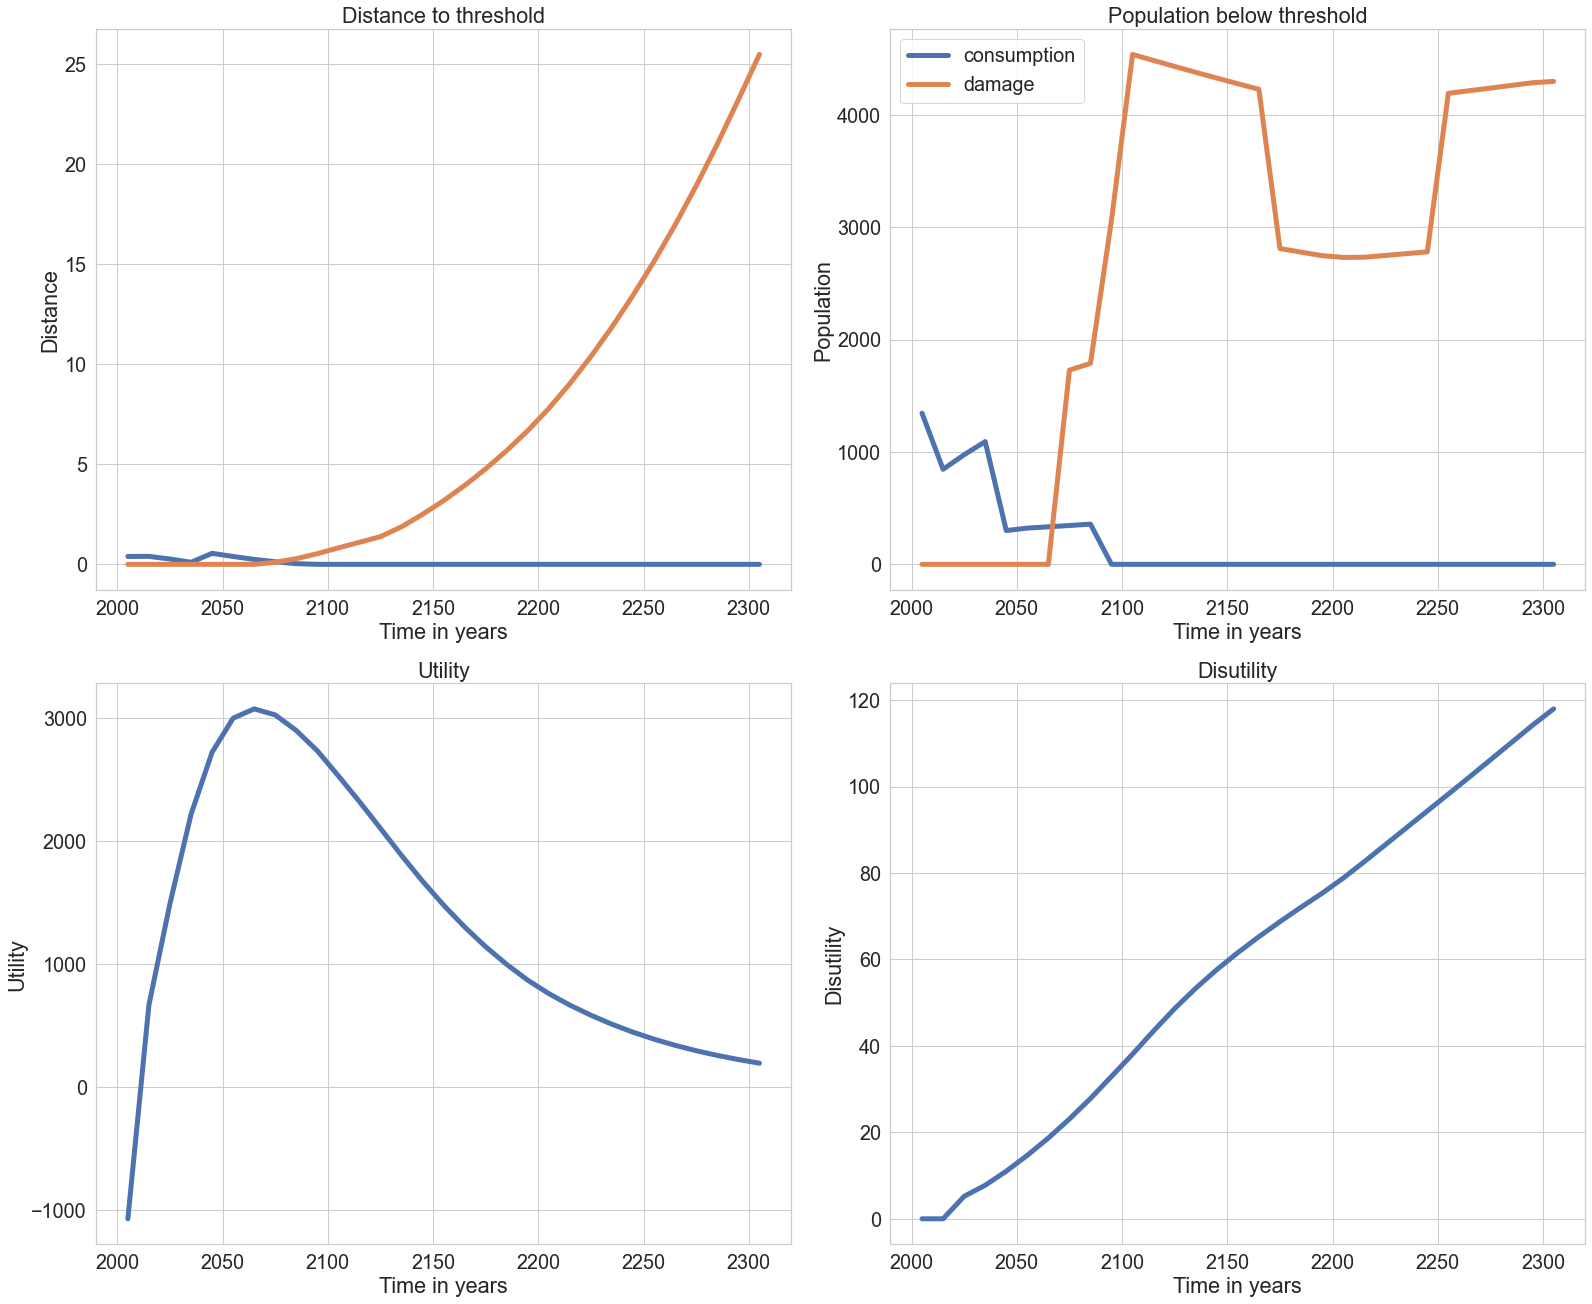

In [11]:
mosaic = """
    AB
    CD
    """
line_width = 5
fig = plt.figure(constrained_layout=True, figsize=(22, 18))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to consumption threshold'], label='consumption', linewidth=line_width)
ax_dict["A"].set_title('Distance to consumption threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to damage threshold'], label='damage', linewidth=line_width)
ax_dict["A"].set_title('Distance to threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population below consumption threshold'], label='consumption', linewidth=line_width)
ax_dict["B"].set_title('Population below consumption threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population above damage threshold'], label='damage', linewidth=line_width)
ax_dict["B"].set_title('Population below threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["C"].plot(results_formatted.df_main.loc[:, 'Utility'], linewidth=line_width, label='consumption')
ax_dict["C"].set_title('Utility')
ax_dict["C"].set_xlabel('Time in years')
ax_dict["C"].set_ylabel('Utility')

ax_dict["D"].plot(results_formatted.df_main.loc[:, 'Disutility'], linewidth=line_width, label='damage')
ax_dict["D"].set_title('Disutility')
ax_dict["D"].set_xlabel('Time in years')
ax_dict["D"].set_ylabel('Disutility')

# Remove duplicate labels
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

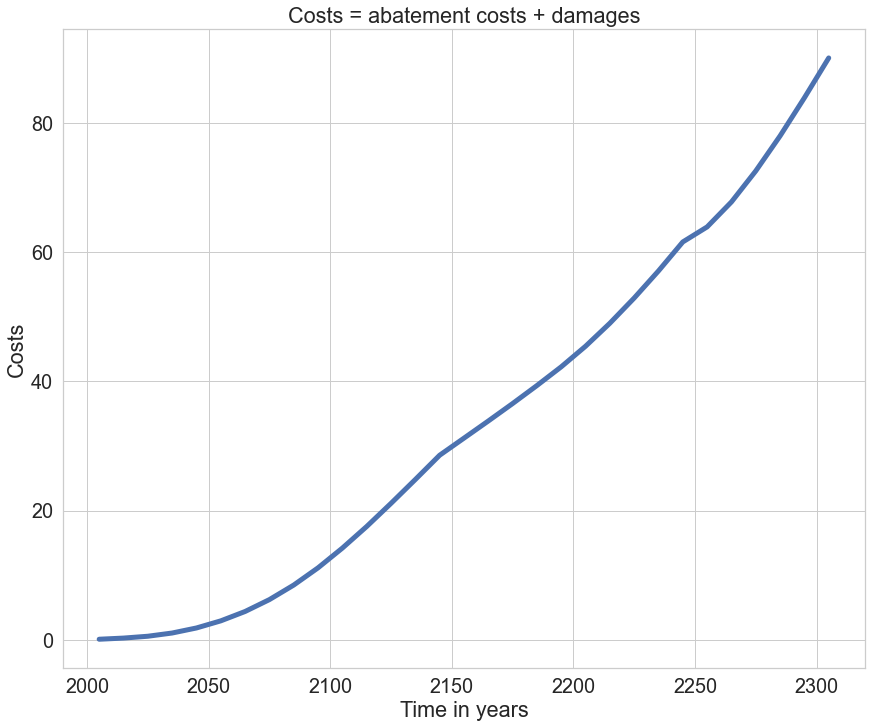

In [12]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Costs'], linewidth=line_with)
ax_dict["A"].set_title('Costs = abatement costs + damages')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Costs')

plt.show()

In [13]:
regions_ = results_formatted.df_main.loc[:, 'Regions above damage threshold']

In [14]:
nrs = []

for value in regions_:
    nrs.append(len(value))

In [15]:
years = list(range(2005, 2310, 10))

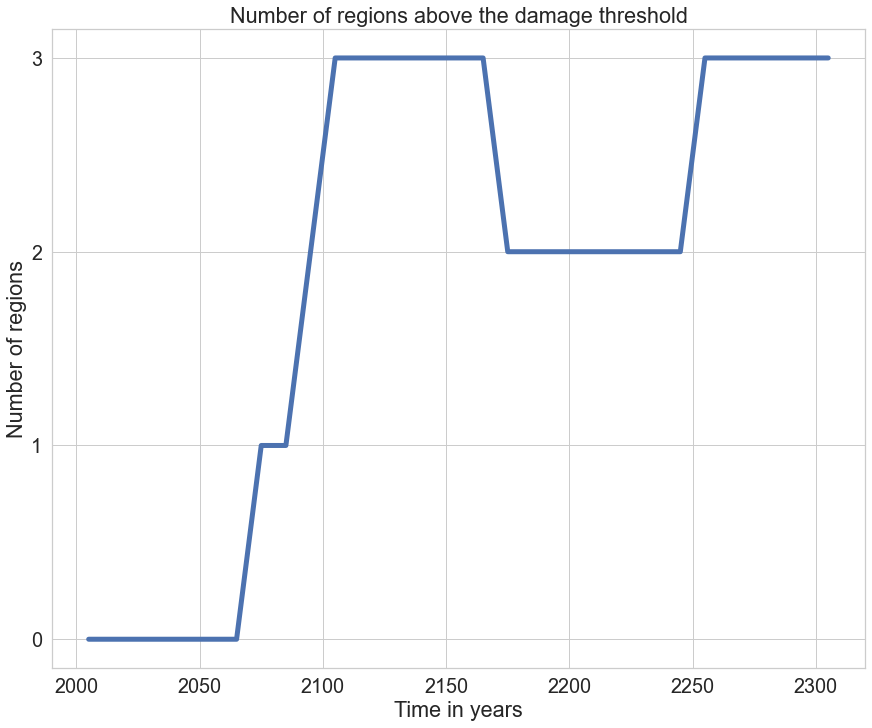

In [16]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, nrs, linewidth=line_with)
ax_dict["A"].set_title('Number of regions above the damage threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Number of regions')
ax_dict["A"].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

## Consumption and damages

In [17]:
consumption = model.econ_model.CPC.sum(axis=0)
damages = model.econ_model.damages.sum(axis=0)
output = model.econ_model.Y.sum(axis=0)
output_gross = model.econ_model.Y_gross.sum(axis=0)

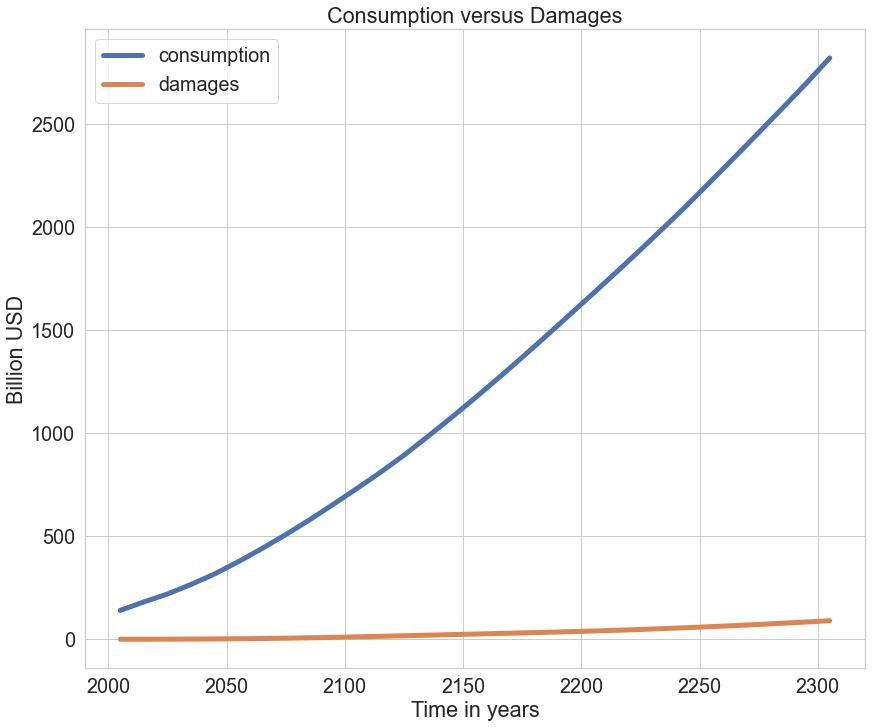

In [21]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, consumption, linewidth=line_with, label='consumption')
ax_dict["A"].plot(years, damages, linewidth=line_with, label='damages')
# ax_dict["A"].plot(years, output, linewidth=line_with, label='Y')
# ax_dict["A"].plot(years, output_gross, linewidth=line_with, label='Y_gross')
ax_dict["A"].set_title('Consumption versus Damages')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Billion USD')

plt.legend()
plt.show()

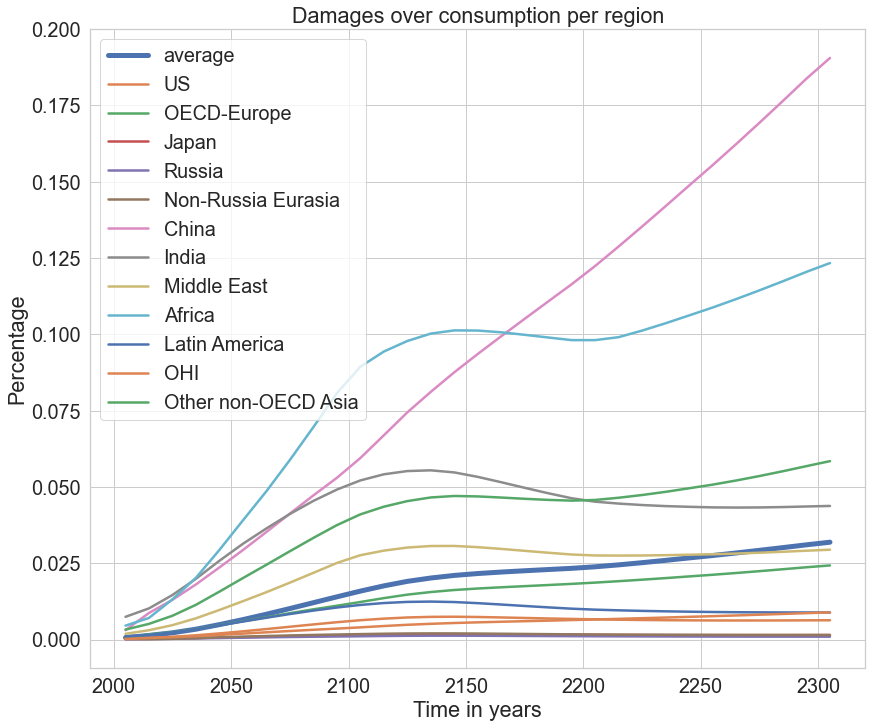

In [19]:
ratio = damages/consumption

mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, ratio, linewidth=line_with, label='average')
ax_dict["A"].set_title('Damages over consumption')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Percentage')

d = model.econ_model.damages
cpc = model.econ_model.CPC
region_names = model.regions_list
ratio_regions = d/cpc

line_with = 2.5
for idx, region in enumerate(ratio_regions):
    ax_dict["A"].plot(years, region, linewidth=line_with, label=f'{region_names[idx]}')
    ax_dict["A"].set_title('Damages over consumption per region')
    ax_dict["A"].set_xlabel('Time in years')
    ax_dict["A"].set_ylabel('Percentage')

plt.legend()
plt.show()

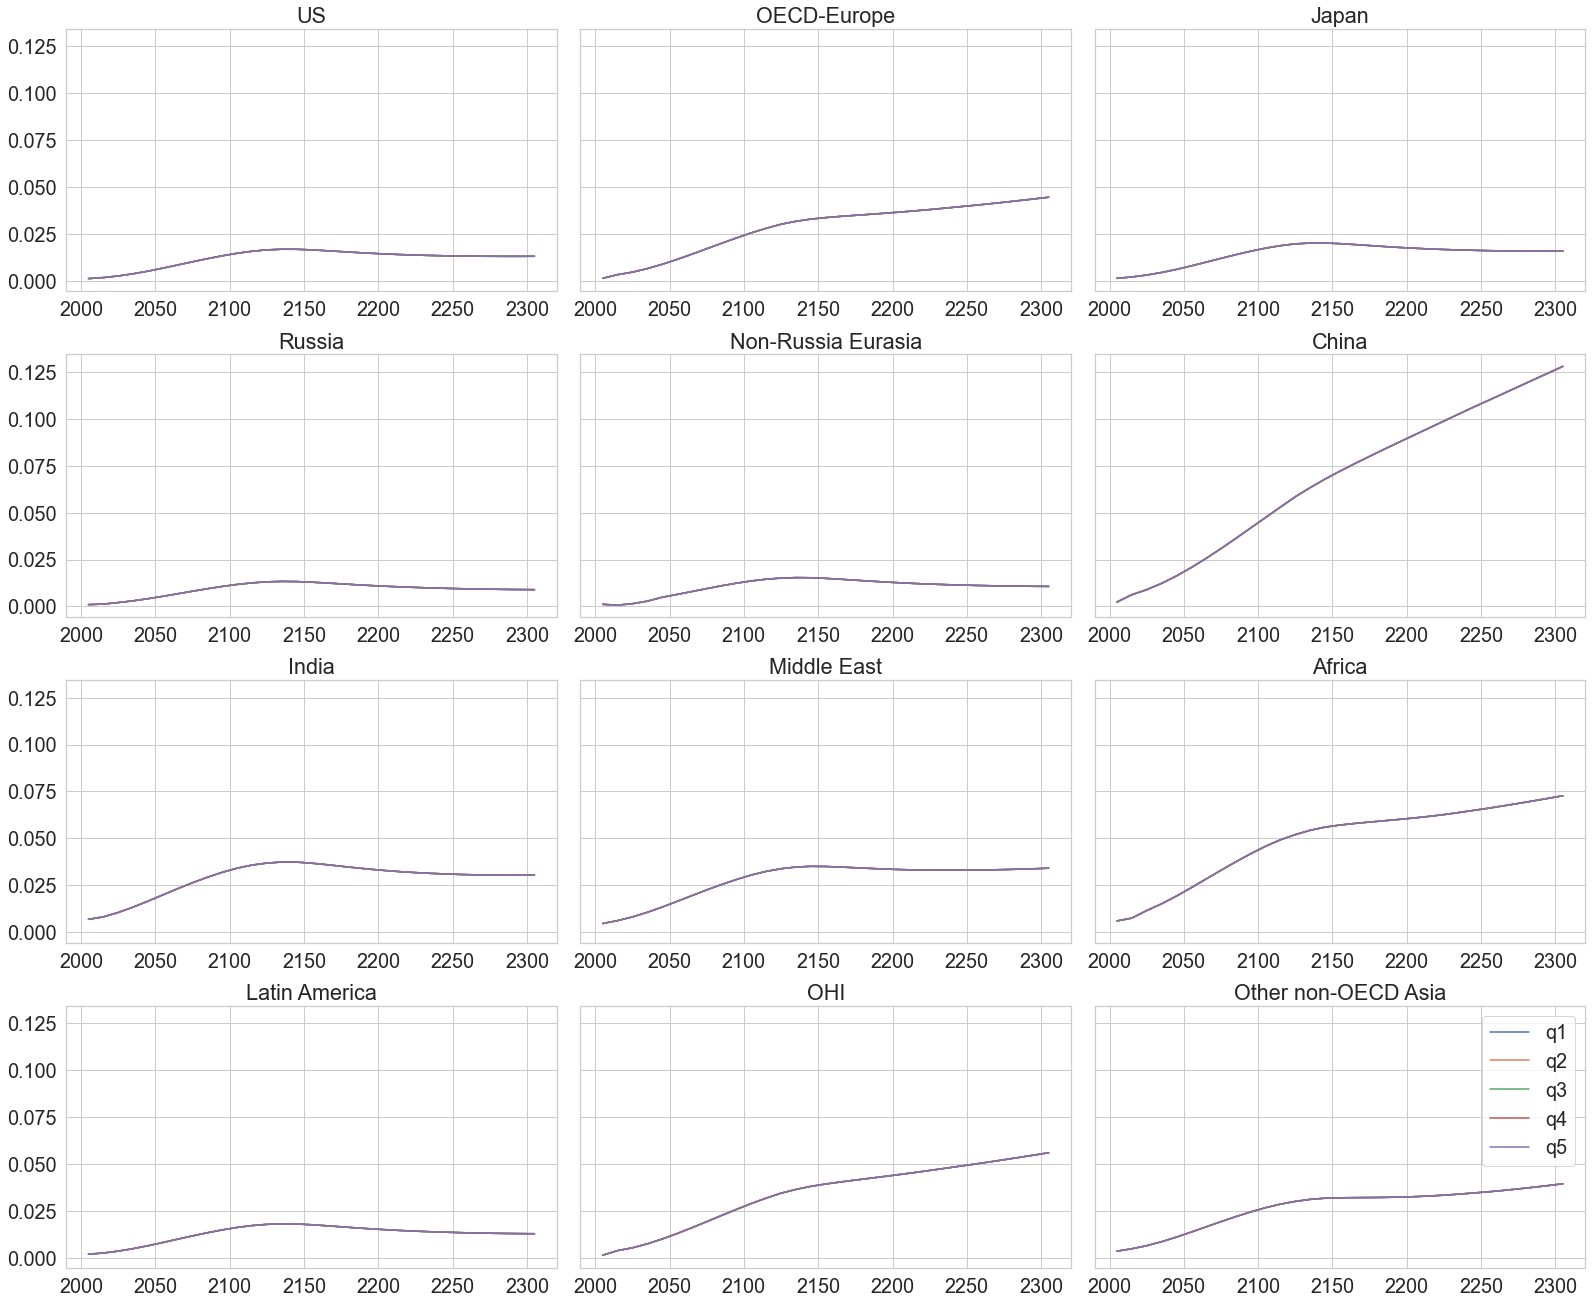

In [20]:
cpcq = results_formatted.df_cpc_pre_damage
damagesq = cpcq - results_formatted.df_cpc_post_damage
ratio_quintiles = damagesq/cpcq
fig, axes = plt.subplots(nrows=4, ncols=3, constrained_layout=True, figsize=(22, 18), sharey='all')

# Figures
for i, ax in enumerate(axes.flat):

    region_values = ratio_quintiles.iloc[:, i]

    for q in range(5):
        q_value = region_values.apply(lambda x: x[q])
        ax.plot(years, q_value, label=f'q{q+1}')
        ax.set_title(f'{region_names[i]}')

plt.legend()
plt.show()